In [105]:
import pandas as pd
import numpy as np
import os,math,sys
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df=pd.read_excel('Global Superstore.xlsx',sheet_name='Orders')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [107]:
df.shape

(51290, 24)

In [108]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51285 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [110]:
numCol=[]
catCol=[]
dateCol=[]
for col in df.columns:
    if df[col].dtype == 'O':
        catCol.append(col)
        if df[col].dtype == 'datetime64[ns]':
            dateCol.append(col)
    else:
        numCol.append(col)

In [111]:
type(catCol)

list

In [112]:
catCol

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Order Priority']

In [113]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [114]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [115]:
dateCol

[]

In [116]:
numCol

['Row ID',
 'Order Date',
 'Ship Date',
 'Postal Code',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost']

In [117]:
numCol=[]
catCol=[]
dateCol=[]
for col in df.columns:
    if df[col].dtype == 'O':
        catCol.append(col)
    elif df[col].dtype == 'datetime64[ns]':
            dateCol.append(col)
    else:
        numCol.append(col)

In [118]:
dateCol

['Order Date', 'Ship Date']

In [119]:
numCol

['Row ID',
 'Postal Code',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost']

In [120]:
catCol

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Order Priority']

In [121]:
df[catCol].describe().T

,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994
Market,51290,7,APAC,11002
Region,51285,13,Central,11117


In [122]:
df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375818,57.296810,0.002,2.610000,7.790,24.4500,933.570


In [123]:
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                5
Product ID            0
Category              2
Sub-Category          1
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [124]:
df.isna().sum()/df.shape[0]*100

Row ID             0.000000
Order ID           0.000000
Order Date         0.000000
Ship Date          0.000000
Ship Mode          0.000000
Customer ID        0.000000
Customer Name      0.000000
Segment            0.000000
City               0.000000
State              0.000000
Country            0.000000
Postal Code       80.514720
Market             0.000000
Region             0.009748
Product ID         0.000000
Category           0.003899
Sub-Category       0.001950
Product Name       0.000000
Sales              0.000000
Quantity           0.000000
Discount           0.000000
Profit             0.000000
Shipping Cost      0.000000
Order Priority     0.000000
dtype: float64

In [126]:
df[df.isna().sum(axis=1)>3]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
24,1570,US-2014-133193,2014-07-31,2014-08-01,First Class,NP-18325,Naresj Patel,Consumer,Juárez,Chihuahua,...,TEC-PH-10004182,NaN,NaN,"Motorola Smart Phone, Full Size",1713.84,4,0.0,445.52,728.968,Critical


<Axes: >

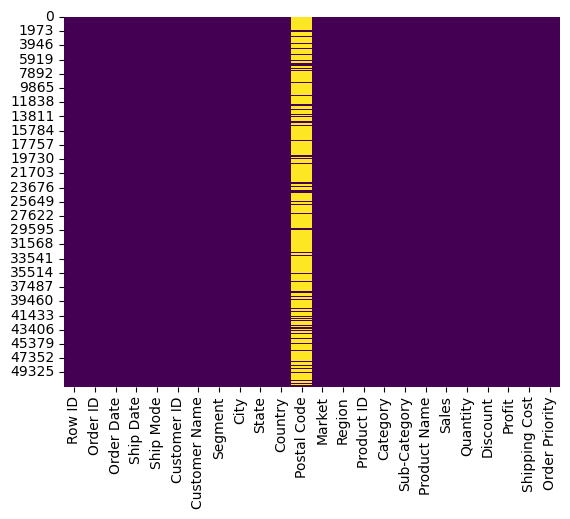

In [127]:
sns.heatmap(df.isna(),cbar=False,cmap='viridis')

In [128]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


In [129]:
for i in catCol:
    print('!--%Null',(df[i].isna().sum()/df[i].shape[0]*100))
    print(df[i].value_counts())
    print('\n')

!--%Null 0.0
Order ID
CA-2014-100111    14
NI-2014-8880      13
TO-2014-9950      13
IN-2012-41261     13
IN-2013-42311     13
                  ..
ID-2014-68085      1
ID-2012-85221      1
CA-2012-119697     1
CA-2011-151967     1
MX-2012-134460     1
Name: count, Length: 25035, dtype: int64


!--%Null 0.0
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64


!--%Null 0.0
Customer ID
PO-18850    97
BE-11335    94
JG-15805    90
SW-20755    89
EM-13960    85
            ..
MG-7650      1
ME-8010      1
RC-9825      1
MG-7890      1
ZC-11910     1
Name: count, Length: 1590, dtype: int64


!--%Null 0.0
Customer Name
Muhammed Yedwab    108
Steven Ward        106
Gary Hwang         102
Patrick O'Brill    102
Bill Eplett        102
                  ... 
Emily Burns         35
David Bremer        34
Darren Budd         31
Nicole Brennan      31
Michael Oakman      29
Name: count, Length: 795, dtype: int64


!--%

In [130]:
Postal_Code=df.loc[:,'Postal Code']

In [131]:
Postal_Code

0        10024.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285        NaN
51286    77095.0
51287    93030.0
51288        NaN
51289        NaN
Name: Postal Code, Length: 51290, dtype: float64

In [132]:
df=df.drop('Postal Code',axis=1)

In [133]:
df.shape

(51290, 23)

In [134]:
df[df.isna().sum(axis=1)>3]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


In [135]:
numCol.remove('Postal Code')

In [136]:
numCol

['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

In [137]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            5
Product ID        0
Category          2
Sub-Category      1
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [138]:
from sklearn.impute import SimpleImputer

In [139]:
imp_median=SimpleImputer(missing_values=np.nan,strategy='median')
imp_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [140]:
df[catCol].isna().sum()

Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            5
Product ID        0
Category          2
Sub-Category      1
Product Name      0
Order Priority    0
dtype: int64

In [141]:
df[numCol].isna().sum()

Row ID           0
Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Cost    0
dtype: int64

In [142]:
df[dateCol].isna().sum()

Order Date    0
Ship Date     0
dtype: int64

In [143]:
#removing missing data 
df[catCol]=imp_mode.fit_transform(df[catCol])

In [144]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [146]:
top_categories=df.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)

In [147]:
top_categories

,Category,Sales
2,Technology,4.740441e+06
0,Furniture,4.110874e+06
1,Office Supplies,3.791187e+06


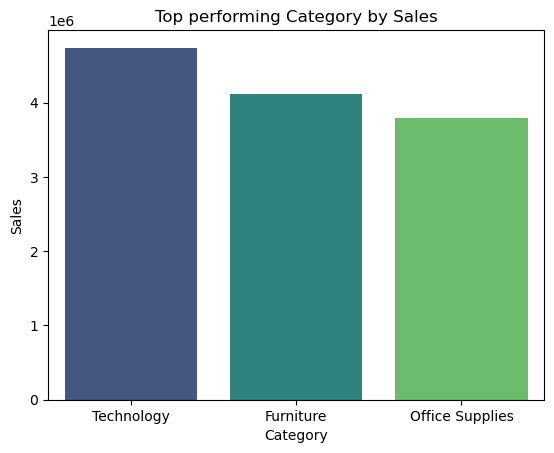

In [152]:
sns.barplot(x='Category',y='Sales',hue='Category',data=top_categories,palette='viridis')
plt.title('Top performing Category by Sales')
plt.show()

In [150]:
Top_country=df.groupby('Country')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)

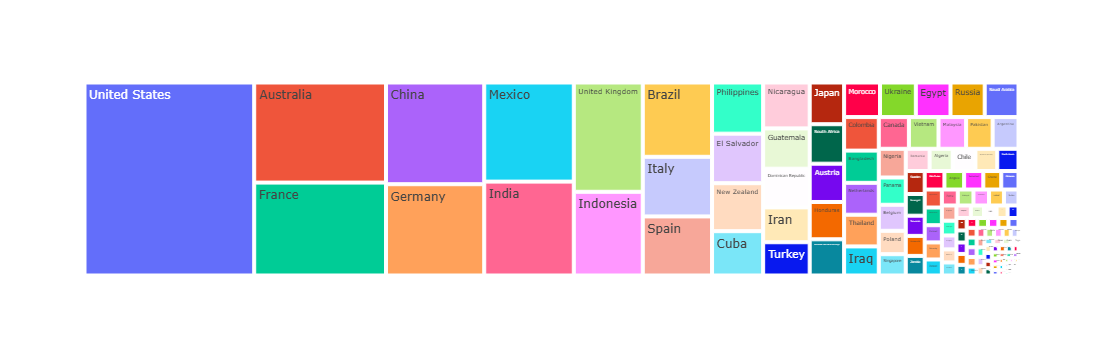

In [162]:
import plotly.express as px
fig = px.treemap(df,path=['Country'],values='Sales')
fig.show()

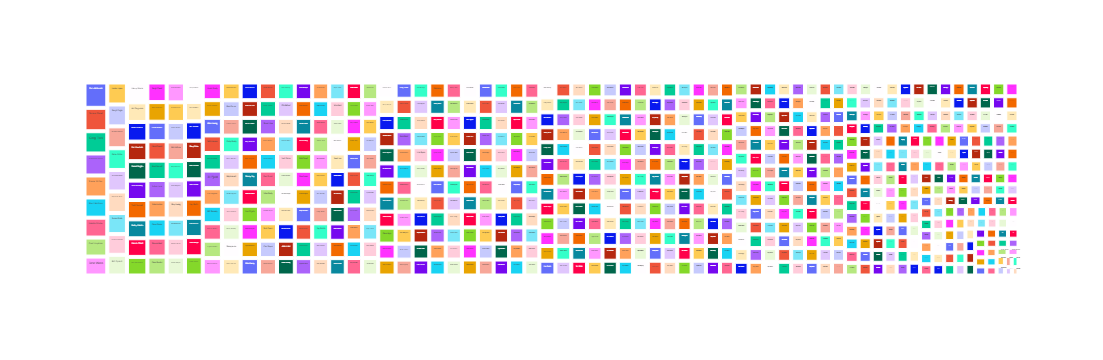

In [164]:
fig=px.treemap(df,path=['Customer Name'],values='Sales')
fig.show()

In [167]:
Top_customers=df.groupby('Customer Name')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=True)

In [168]:
Top_customers['Cumulative Percentage']=Top_customers['Sales'].cumsum() / Top_customers['Sales'].sum()/100

In [169]:
Top_customers

,Customer Name,Sales,Cumulative Percentage
788,Vivian Mathis,3892.22700,0.000003
135,Catherine Glotzbach,4115.20800,0.000006
419,Karen Seio,5324.97318,0.000011
724,Sung Shariari,5328.46480,0.000015
529,Michael Oakman,5460.58400,0.000019
...,...,...,...
687,Sean Miller,35170.93296,0.009882
157,Christopher Conant,35187.07640,0.009910
313,Greg Tran,35550.95428,0.009938
731,Tamara Chand,37457.33300,0.009968


In [170]:
Top_customers

,Customer Name,Sales,Cumulative Percentage
788,Vivian Mathis,3892.22700,0.000003
135,Catherine Glotzbach,4115.20800,0.000006
419,Karen Seio,5324.97318,0.000011
724,Sung Shariari,5328.46480,0.000015
529,Michael Oakman,5460.58400,0.000019
...,...,...,...
687,Sean Miller,35170.93296,0.009882
157,Christopher Conant,35187.07640,0.009910
313,Greg Tran,35550.95428,0.009938
731,Tamara Chand,37457.33300,0.009968


In [174]:
Top_Customer1=df.groupby('Customer Name')['Sales'].sum().nlargest(10).reset_index()

In [175]:
Top_Customer1

,Customer Name,Sales
0,Tom Ashbrook,40488.07080
1,Tamara Chand,37457.33300
2,Greg Tran,35550.95428
3,Christopher Conant,35187.07640
4,Sean Miller,35170.93296
5,Bart Watters,32310.44650
6,Natalie Fritzler,31781.25850
7,Fred Hopkins,30400.67452
8,Jane Waco,30288.45030
9,Hunter Lopez,30243.56658


<Axes: xlabel='Sales', ylabel='Customer Name'>

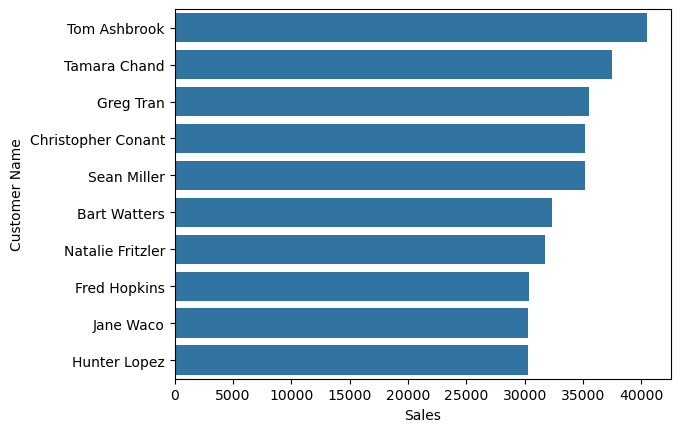

In [176]:
sns.barplot(x='Sales',y='Customer Name',data=Top_Customer1)

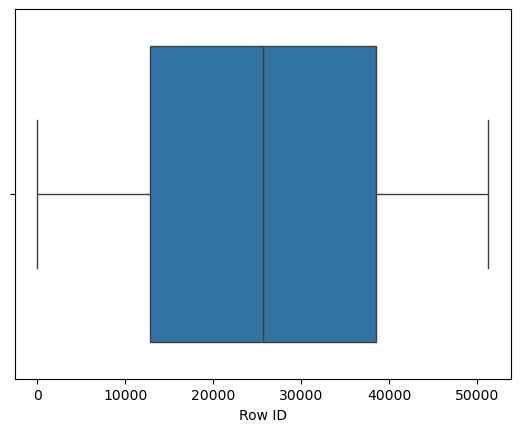

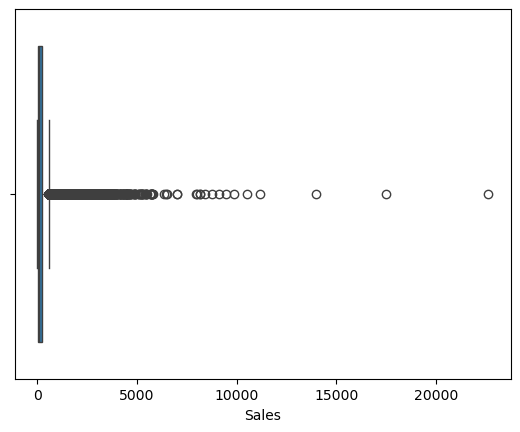

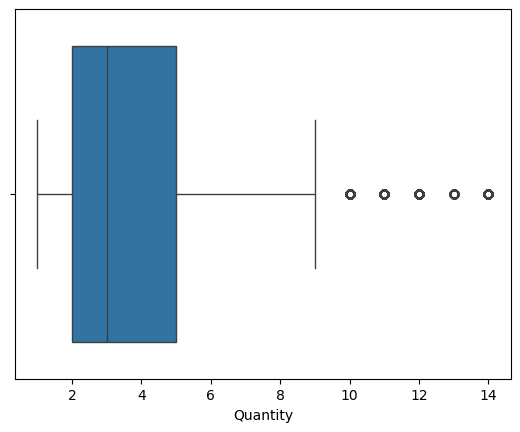

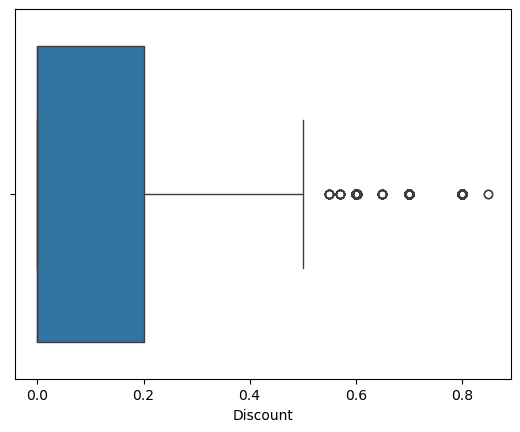

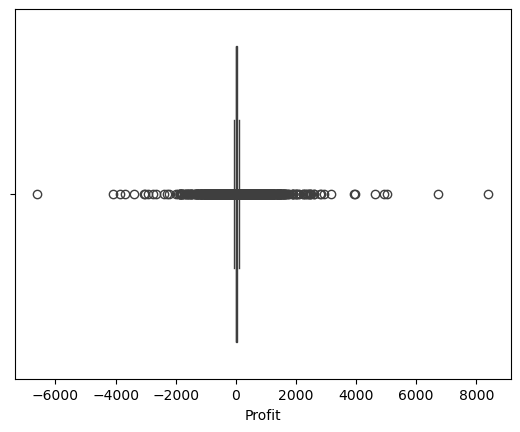

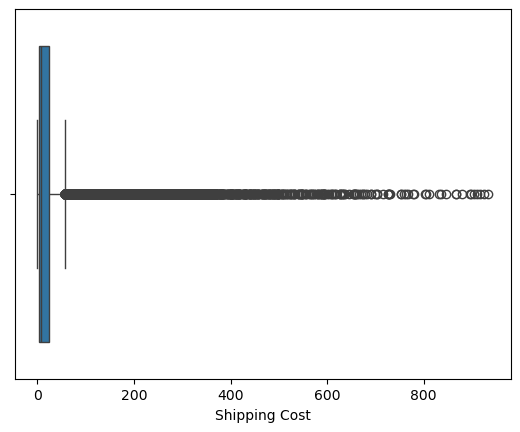

In [177]:
for i in numCol:
    plt.figure()
    sns.boxplot(x=df[i])

In [178]:
Q1=df[numCol].quantile(0.25)
Q3=df[numCol].quantile(0.75)
IQR=Q3-Q1
print(((df[numCol]<(Q1-1.5*IQR))|(df[numCol]>(Q3+1.5*IQR))).sum())

Row ID              0
Sales            5655
Quantity          877
Discount         4172
Profit           9755
Shipping Cost    5909
dtype: int64


In [179]:
df['Row ID']

0        32298
1        26341
2        25330
3        13524
4        47221
         ...  
51285    29002
51286    35398
51287    40470
51288     9596
51289     6147
Name: Row ID, Length: 51290, dtype: int64

In [180]:
outliers_numCol=df[numCol].drop('Row ID',axis=1).columns.tolist()

In [181]:
outliers_numCol

['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

In [182]:
numCol

['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

In [183]:
#Handling Outliers
Outnum=[]
for i in outliers_numCol:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    Outnum.append([i,Q1,Q3,IQR,lower_limit,upper_limit])

    df[i]=np.where(df[i]>upper_limit,upper_limit,
    np.where(df[i]<lower_limit,lower_limit,df[i]))

In [184]:
print(((df[numCol]<(Q1-1.5*IQR))|(df[numCol]>(Q3+1.5*IQR))).sum())

Row ID           51233
Sales            30522
Quantity             0
Discount             0
Profit           14564
Shipping Cost        0
dtype: int64


In [185]:
pd.DataFrame(Outnum,columns=('Variables','Q1','Q3','IQR','lower_limit','upper_limit'))

,Variables,Q1,Q3,IQR,lower_limit,upper_limit
0,Sales,30.758625,251.0532,220.294575,-299.683238,581.495063
1,Quantity,2.000000,5.0000,3.000000,-2.500000,9.500000
2,Discount,0.000000,0.2000,0.200000,-0.300000,0.500000
3,Profit,0.000000,36.8100,36.810000,-55.215000,92.025000
4,Shipping Cost,2.610000,24.4500,21.840000,-30.150000,57.210000


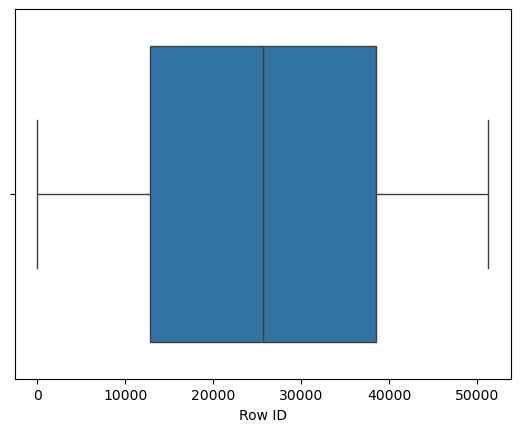

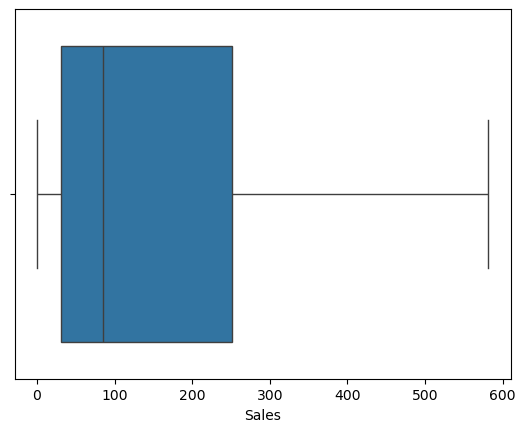

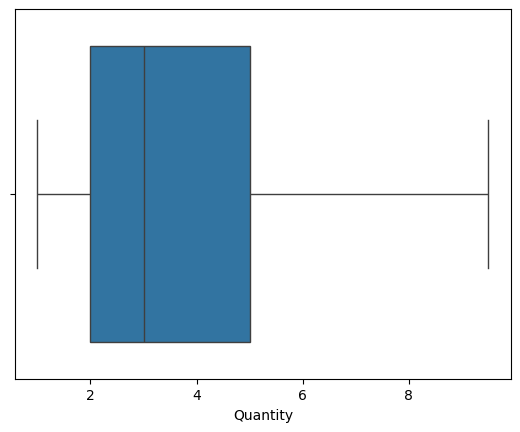

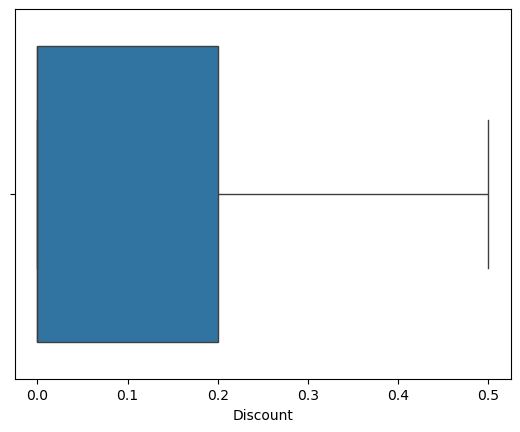

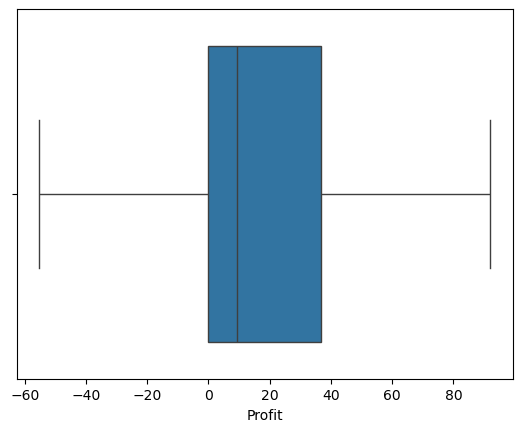

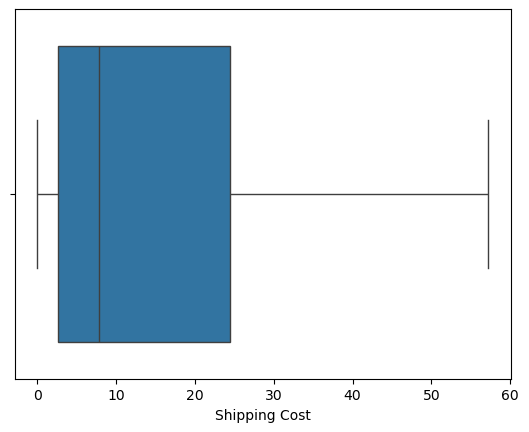

In [186]:
for i in numCol:
    plt.figure()
    sns.boxplot(x=df[i])

In [187]:
df[catCol]

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,CA-2012-124891,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,IN-2013-77878,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,IN-2013-71249,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Central,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,ES-2013-1579342,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,SG-2013-4320,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2014-62366,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",Medium
51286,US-2014-102288,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,Medium
51287,US-2013-155768,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",High
51288,MX-2012-140767,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",Medium


In [188]:
df_copy=df.copy()

In [189]:
df_copy.shape

(51290, 23)

In [190]:
df.shape

(51290, 23)

In [191]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [192]:
for i in catCol:
    print(i,df[i].nunique())

Order ID 25035
Ship Mode 4
Customer ID 1590
Customer Name 795
Segment 3
City 3636
State 1094
Country 147
Market 7
Region 13
Product ID 10292
Category 3
Sub-Category 17
Product Name 3788
Order Priority 4


In [193]:
df_encode=df.drop(['Order ID','Customer ID','Product ID'],axis=1)

In [194]:
df_encode_col=df.drop(['Order ID','Customer ID','Product ID'],axis=1).columns.tolist()

In [195]:
df_encode_col

['Row ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Market',
 'Region',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority']

In [196]:
Encode_catcol=[]
Encode_numCol=[]
Encode_dateCol=[]
for i in df_encode.columns:
    if df_encode[i].dtype=='O':
        Encode_catcol.append(i)
    elif df_encode[i].dtype=='datetime64[ns]':
        Encode_numCol.append(i)
    else:
        Encode_numCol.append(i)

In [197]:
df_encode.shape

(51290, 20)

In [198]:
df[Encode_catcol].dtypes

Ship Mode         object
Customer Name     object
Segment           object
City              object
State             object
Country           object
Market            object
Region            object
Category          object
Sub-Category      object
Product Name      object
Order Priority    object
dtype: object

In [199]:
for i in Encode_catcol:
    print(i,df[i].nunique())

Ship Mode 4
Customer Name 795
Segment 3
City 3636
State 1094
Country 147
Market 7
Region 13
Category 3
Sub-Category 17
Product Name 3788
Order Priority 4


In [200]:
High_unique=[]
low_unique=[]
for i in Encode_catcol:
    if df[i].nunique()>4:
        High_unique.append(i)
    else:
        low_unique.append(i)

In [201]:
High_unique

['Customer Name',
 'City',
 'State',
 'Country',
 'Market',
 'Region',
 'Sub-Category',
 'Product Name']

In [202]:
low_unique

['Ship Mode', 'Segment', 'Category', 'Order Priority']

In [203]:
for i in High_unique:
    print(i,df[i].nunique())

Customer Name 795
City 3636
State 1094
Country 147
Market 7
Region 13
Sub-Category 17
Product Name 3788


In [204]:
for i in low_unique:
    print(i,df[i].nunique())

Ship Mode 4
Segment 3
Category 3
Order Priority 4


In [205]:
#Variable Transformation using Label Encoder
le=LabelEncoder()
for i in High_unique:
    df[i]=le.fit_transform(df[i])

In [206]:
df[High_unique].head()

,Customer Name,City,State,Country,Market,Region,Sub-Category,Product Name
0,632,2290,703,139,6,6,0,2750
1,413,3518,702,6,0,9,5,2525
2,181,497,820,6,0,3,13,2502
3,424,375,145,47,4,3,13,2414
4,632,857,270,110,1,0,6,3158


In [207]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,632,Consumer,2290,703,...,TEC-AC-10003033,Technology,0,2750,581.495063,7.0,0.0,92.025,57.21,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,413,Corporate,3518,702,...,FUR-CH-10003950,Furniture,5,2525,581.495063,9.0,0.1,-55.215,57.21,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,181,Consumer,497,820,...,TEC-PH-10004664,Technology,13,2502,581.495063,9.0,0.1,92.025,57.21,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,424,Home Office,375,145,...,TEC-PH-10004583,Technology,13,2414,581.495063,5.0,0.1,-55.215,57.21,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,632,Consumer,857,270,...,TEC-SHA-10000501,Technology,6,3158,581.495063,8.0,0.0,92.025,57.21,Critical


In [208]:
# encode the categorical columns using OneHot Encoder
for i in low_unique:
    y=pd.get_dummies(df[i],prefix=i)
    df=pd.concat([df,y],axis=1)

In [209]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,632,Consumer,2290,703,...,True,False,False,False,False,True,True,False,False,False
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,413,Corporate,3518,702,...,False,True,False,True,False,False,True,False,False,False
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,181,Consumer,497,820,...,True,False,False,False,False,True,False,False,False,True
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,424,Home Office,375,145,...,False,False,True,False,False,True,False,False,False,True
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,632,Consumer,857,270,...,True,False,False,False,False,True,True,False,False,False


In [210]:
df.shape

(51290, 37)

In [211]:
colsubset=[i for i in df.columns if 'Priority' in i]

In [212]:
df[colsubset]

,Order Priority,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,Critical,True,False,False,False
1,Critical,True,False,False,False
2,Medium,False,False,False,True
3,Medium,False,False,False,True
4,Critical,True,False,False,False
...,...,...,...,...,...
51285,Medium,False,False,False,True
51286,Medium,False,False,False,True
51287,High,False,True,False,False
51288,Medium,False,False,False,True


In [213]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Segment_Consumer', 'Segment_Corporate',
       'Segment_Home Office', 'Category_Furniture', 'Category_Office Supplies',
       'Category_Technology', 'Order Priority_Critical', 'Order Priority_High',
       'Order Priority_Low', 'Order Priority_Medium'],
      dtype='object')

In [214]:
df['Shipping_Delay']=(df['Ship Date']-df['Order Date']).dt.days

In [215]:
df['Shipping_Delay']

0        0
1        2
2        1
3        2
4        1
        ..
51285    0
51286    4
51287    0
51288    4
51289    4
Name: Shipping_Delay, Length: 51290, dtype: int64

In [216]:
delay_by_mode=df.groupby('Ship Mode')['Shipping_Delay'].mean().reset_index()

In [217]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Segment_Consumer', 'Segment_Corporate',
       'Segment_Home Office', 'Category_Furniture', 'Category_Office Supplies',
       'Category_Technology', 'Order Priority_Critical', 'Order Priority_High',
       'Order Priority_Low', 'Order Priority_Medium', 'Shipping_Delay'],
      dtype='object')

In [218]:
delay_by_mode

,Ship Mode,Shipping_Delay
0,First Class,2.181746
1,Same Day,0.037394
2,Second Class,3.230187
3,Standard Class,4.998018


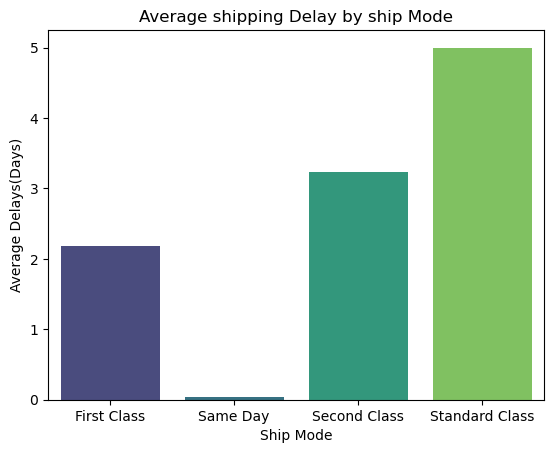

In [219]:
sns.barplot(x='Ship Mode',y='Shipping_Delay',hue='Ship Mode',data=delay_by_mode,palette='viridis')
plt.title('Average shipping Delay by ship Mode')
plt.ylabel('Average Delays(Days)')
plt.xlabel('Ship Mode')
plt.show()

In [220]:
df.to_excel('EDA_Global_supertore.xlsx')

In [221]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Ship Mode_First Class',
       'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Segment_Consumer', 'Segment_Corporate',
       'Segment_Home Office', 'Category_Furniture', 'Category_Office Supplies',
       'Category_Technology', 'Order Priority_Critical', 'Order Priority_High',
       'Order Priority_Low', 'Order Priority_Medium', 'Shipping_Delay'],
      dtype='object')

In [222]:
df['Ship Mode']

0              Same Day
1          Second Class
2           First Class
3           First Class
4              Same Day
              ...      
51285          Same Day
51286    Standard Class
51287          Same Day
51288    Standard Class
51289      Second Class
Name: Ship Mode, Length: 51290, dtype: object